In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Import all data

In [2]:
X_train = pd.read_parquet("Xtime/X_train.parquet")
X_test = pd.read_parquet("Xtime/X_test.parquet")
Y_train = pd.read_parquet("Ytime/Y_train.parquet")
Y_test = pd.read_parquet("Ytime/Y_test.parquet")
X_train = X_train[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']]
X_test = X_test[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']]
Complete = pd.read_parquet("time_dataset.parquet")

In [3]:
scalerX = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train))
X_test = pd.DataFrame(scalerX.transform(X_test))
scalerY = MinMaxScaler().fit(Y_train)
Y_train = pd.DataFrame(scalerY.transform(Y_train))
Y_test = pd.DataFrame(scalerY.transform(Y_test))
Y1_train = Y_train[[0]]
Y1_test = Y_test[[0]]
Y2_train = Y_train[[1]]
Y2_test = Y_test[[1]]
Y3_train = Y_train[[2]]
Y3_test = Y_test[[2]]
Y4_train = Y_train[[3]]
Y4_test = Y_test[[3]]
Y5_train = Y_train[[4]]
Y5_test = Y_test[[4]]
Y6_train = Y_train[[5]]
Y6_test = Y_test[[5]]

## Train and score

In [4]:
parameters = {'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
              'n_estimators':[50, 100, 200, 500, 1000],
              'max_depth': [2,3,5,10,20,30,50,100]} 

In [5]:
def GridSearch(rf, X_train, X_test, y_train, y_test, grid, verbose=False):
    best_score = 0
    par = ParameterGrid(grid)
    ln = len(par)
    i = 0
    for g in par:
        if(verbose):
            print(f"Probando: {g}, {i} de {ln}")
        i+=1
        rf.set_params(**g)
        startTime = time.time()
        rf.fit(X_train, np.ravel(y_train))
        elapsedTime = time.time() - startTime
        score = rf.score(X_test, y_test)
        if(verbose):
            print(f"Tiempo de entrenamiento: {elapsedTime} s, score: {score}")
        # save if best
        if score > best_score:
            best_score = score
            best_grid = g
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_grid}")
    return best_grid

In [6]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y1_train, Y1_test, parameters, verbose=True)
clf1 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y1_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.1533346176147461 s, score: 0.0813851568496411
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.3424053192138672 s, score: 0.15555035422403773
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.8657307624816895 s, score: 0.2845698181891052
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 1.6326708793640137 s, score: 0.5593837117358167
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 3.3819613456726074 s, score: 0.7941727103817715
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.3313884735107422 s, score: 0.08068530068593671
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10

Tiempo de entrenamiento: 1.6295366287231445 s, score: 0.7982983110342984
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 3.7990100383758545 s, score: 0.9288691463539893
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 7.709331750869751 s, score: 0.9363463305919943
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.6049737930297852 s, score: 0.3588504249217632
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 1.3173658847808838 s, score: 0.5702447663765347
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 2.765394687652588 s, score: 0.7885059022893177
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 6.8329243659973145 s, score: 0.905041

Tiempo de entrenamiento: 0.8175048828125 s, score: 0.5629293506331042
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 1.5917189121246338 s, score: 0.7802196527472193
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 2.9715957641601562 s, score: 0.8934032859337315
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 5.976234674453735 s, score: 0.9139784071014256
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 7.2051777839660645 s, score: 0.9129606135209899
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.8516709804534912 s, score: 0.5677279773888023
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 1.6507868766784668 s, score: 0.784109

Tiempo de entrenamiento: 1.0481996536254883 s, score: 0.9019287564528548
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 1.1960391998291016 s, score: 0.9118370443880996
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.13809990882873535 s, score: 0.9861264846078923
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.2799959182739258 s, score: 0.9883525964284733
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.5503954887390137 s, score: 0.9853872416544651
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 1.3975441455841064 s, score: 0.9809876149908833
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 2.7460432052612305 s, score: 0.977444608

Tiempo de entrenamiento: 0.5547759532928467 s, score: 0.9044742123013937
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.5618417263031006 s, score: 0.9192203920346713
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.7918238639831543 s, score: 0.9669922157598861
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.7372729778289795 s, score: 0.940788856791883
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.10400867462158203 s, score: 0.9106319325717411
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.18327593803405762 s, score: 0.8806908066357981
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.16083478927612305 s, score: 0.892500393

In [7]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y2_train, Y2_test, parameters, verbose=True)
clf2 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y2_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.1980593204498291 s, score: 0.09327525670911185
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.39580392837524414 s, score: 0.17772681243716104
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.6021313667297363 s, score: 0.32335968724603165
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 1.8732483386993408 s, score: 0.6207862415879508
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 3.525266408920288 s, score: 0.8523051674608344
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.2639765739440918 s, score: 0.09480528100212393
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 

Tiempo de entrenamiento: 1.253265142440796 s, score: 0.8632369676847468
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 3.0337886810302734 s, score: 0.9905271970730094
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 5.988556861877441 s, score: 0.9971755795844118
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.504849910736084 s, score: 0.39397217637757964
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 0.983680009841919 s, score: 0.6325713630063271
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 1.9311692714691162 s, score: 0.8642231006011052
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 4.6779375076293945 s, score: 0.9913998

Tiempo de entrenamiento: 0.5376036167144775 s, score: 0.6333104099410943
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 1.0529906749725342 s, score: 0.8647766375985528
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 2.0625081062316895 s, score: 0.9800708934921092
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 4.262355327606201 s, score: 0.9975900804341044
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 5.168581962585449 s, score: 0.9976111206627813
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.5884091854095459 s, score: 0.6333407271899761
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 1.0500197410583496 s, score: 0.8647

Tiempo de entrenamiento: 1.0821812152862549 s, score: 0.997516119963989
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 1.2071099281311035 s, score: 0.9975418363441372
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.1384429931640625 s, score: 0.9978591534517585
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.2895009517669678 s, score: 0.997874157270371
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.565636396408081 s, score: 0.9975380946068962
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 1.3718445301055908 s, score: 0.9973855744158499
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 2.8026485443115234 s, score: 0.9971599838933

Tiempo de entrenamiento: 0.41091465950012207 s, score: 0.9966808906712677
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.4222407341003418 s, score: 0.9943954501747861
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.5033924579620361 s, score: 0.9971025765688937
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.6767139434814453 s, score: 0.9944287179779066
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.09933090209960938 s, score: 0.9976765322114105
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.12481975555419922 s, score: 0.9976775427350842
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.1276252269744873 s, score: 0.99767252

In [8]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y3_train, Y3_test, parameters, verbose=True)
clf3 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y3_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.16174054145812988 s, score: 0.07882842287962277
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.28812122344970703 s, score: 0.15607904273390516
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.5901331901550293 s, score: 0.28924478227358463
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 1.4198758602142334 s, score: 0.5708954681835136
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 3.115774393081665 s, score: 0.7999430538316148
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.28907275199890137 s, score: 0.07384904349148358
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators'

Tiempo de entrenamiento: 1.215538740158081 s, score: 0.7338801711751584
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 3.0364441871643066 s, score: 0.8784313059410022
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 6.1831183433532715 s, score: 0.879165475812956
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.5130422115325928 s, score: 0.330954231316989
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 1.0634422302246094 s, score: 0.52860248545175
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 2.096425771713257 s, score: 0.7407899321865905
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 5.121874094009399 s, score: 0.85568009123

Tiempo de entrenamiento: 0.6171829700469971 s, score: 0.5361979691952954
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 1.1658217906951904 s, score: 0.7338398415893139
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 2.209427833557129 s, score: 0.8487142007747821
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 4.285078287124634 s, score: 0.8767662921960129
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 5.163564920425415 s, score: 0.8835722632832499
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.6437211036682129 s, score: 0.528329636737202
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 1.1796681880950928 s, score: 0.736065

Tiempo de entrenamiento: 1.0937795639038086 s, score: 0.8569868241915044
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 1.1885504722595215 s, score: 0.8797342786283827
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.130401611328125 s, score: 0.9657833426076288
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.2770678997039795 s, score: 0.9468124886765015
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.5507473945617676 s, score: 0.9420618032438745
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 1.46531343460083 s, score: 0.935801571934782
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 2.8226826190948486 s, score: 0.94270439150912

Tiempo de entrenamiento: 0.533313512802124 s, score: 0.8474574454854544
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.5178148746490479 s, score: 0.8251250104732837
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.6392495632171631 s, score: 0.8225085794324412
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.7167985439300537 s, score: 0.810514476884202
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.11301612854003906 s, score: 0.8020672735422302
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.11800837516784668 s, score: 0.9698483514967795
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.1465299129486084 s, score: 0.82257603427

In [9]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y4_train, Y4_test, parameters, verbose=True)
clf4 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y4_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.16723132133483887 s, score: 0.06611875754925045
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.29189276695251465 s, score: 0.1293174597358211
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.5679717063903809 s, score: 0.24977561050775776
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 1.415994644165039 s, score: 0.5395864847333774
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 2.7885849475860596 s, score: 0.778249522746287
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.19832658767700195 s, score: 0.07265091067929874
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 

Tiempo de entrenamiento: 1.6124904155731201 s, score: 0.726219949733163
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 4.211041688919067 s, score: 0.8679405940619425
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 8.081553936004639 s, score: 0.8732146230009572
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.7686138153076172 s, score: 0.3248728952434239
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 1.4223482608795166 s, score: 0.5268260619788192
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 2.5179989337921143 s, score: 0.7308483153085314
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 6.8102710247039795 s, score: 0.8481136

Tiempo de entrenamiento: 0.7854692935943604 s, score: 0.5285315349038459
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 1.6710903644561768 s, score: 0.7357161246685424
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 2.6457104682922363 s, score: 0.8514814012036982
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 5.923520088195801 s, score: 0.8586745924689896
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 5.85504412651062 s, score: 0.8676299819038334
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.7496912479400635 s, score: 0.5236045200066464
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 1.6307706832885742 s, score: 0.73981

Tiempo de entrenamiento: 1.290895700454712 s, score: 0.8495608360517962
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 1.7382185459136963 s, score: 0.8731561990315666
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.18193984031677246 s, score: 0.9489207526314097
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.36736083030700684 s, score: 0.9583748313070561
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.617546796798706 s, score: 0.9588761854428786
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 1.6860058307647705 s, score: 0.9560472870315461
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 4.161409854888916 s, score: 0.95840574650

Tiempo de entrenamiento: 0.4583120346069336 s, score: 0.7876907003618545
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.7110145092010498 s, score: 0.7876288742106028
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.6063222885131836 s, score: 0.7871549037814721
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.8296365737915039 s, score: 0.933126701647125
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.1422271728515625 s, score: 0.8082625443907754
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.17784500122070312 s, score: 0.9006998539223109
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.13569188117980957 s, score: 0.8106142291

In [10]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y5_train, Y5_test, parameters, verbose=True)
clf5 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y5_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.16507649421691895 s, score: 0.07270981589011838
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.3667926788330078 s, score: 0.14647849257282652
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.6367685794830322 s, score: 0.27896579892780626
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 1.7755634784698486 s, score: 0.5592637729097252
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 3.2725980281829834 s, score: 0.7896668165743079
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.310732364654541 s, score: 0.07222364970640571
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 

Tiempo de entrenamiento: 1.7768263816833496 s, score: 0.7572755854561375
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 4.135420799255371 s, score: 0.8928540427107406
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 9.377671480178833 s, score: 0.9073245308913306
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.6578807830810547 s, score: 0.3292868120319611
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 1.185528039932251 s, score: 0.5276273173630344
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 2.873391628265381 s, score: 0.7231550601192918
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 9.27289605140686 s, score: 0.8716886315

Tiempo de entrenamiento: 0.6616921424865723 s, score: 0.5282463151878709
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 1.7921671867370605 s, score: 0.741251050646378
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 2.9644458293914795 s, score: 0.8601398801393628
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 5.9846484661102295 s, score: 0.9013809915602339
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 7.0586090087890625 s, score: 0.8904485890967769
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.9402797222137451 s, score: 0.5290768122566113
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 1.6768243312835693 s, score: 0.742

Tiempo de entrenamiento: 1.7716033458709717 s, score: 0.8970388747427541
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 2.032585382461548 s, score: 0.8959324611190685
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.2797422409057617 s, score: 0.9498923698815672
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.558197021484375 s, score: 0.9507960452249712
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.9733211994171143 s, score: 0.9457875893617844
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 2.049424409866333 s, score: 0.9435248867938621
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 4.027924060821533 s, score: 0.94833858507944

Tiempo de entrenamiento: 0.8917286396026611 s, score: 0.8813630734700844
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.7852544784545898 s, score: 0.9377632637250841
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 1.0074577331542969 s, score: 0.8732774820559938
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.938115119934082 s, score: 0.8697214330196612
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.23143935203552246 s, score: 0.931526115863424
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.3075239658355713 s, score: 0.8569169350584428
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.19345974922180176 s, score: 0.96435962392

In [6]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y6_train, Y6_test, parameters, verbose=True)
clf6 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y6_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.24146723747253418 s, score: 0.08208904391251348
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.4916050434112549 s, score: 0.15702442485591117
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 1.1462554931640625 s, score: 0.2874218192935437
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 2.4979805946350098 s, score: 0.5628401505271439
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 4.933226823806763 s, score: 0.7972497349991877
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.3716590404510498 s, score: 0.08079814044352196
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1

Tiempo de entrenamiento: 1.776209831237793 s, score: 0.7872539033950768
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 4.136638641357422 s, score: 0.9317302003918644
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 8.244735956192017 s, score: 0.9443832520157195
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.8487486839294434 s, score: 0.35708727076946845
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 1.650181770324707 s, score: 0.5660089201379523
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 2.9083240032196045 s, score: 0.7828015969171122
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 8.70618486404419 s, score: 0.922149363

Tiempo de entrenamiento: 1.1569530963897705 s, score: 0.5632759862337826
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 2.131967306137085 s, score: 0.7882493211335363
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 3.913862466812134 s, score: 0.9070082116877364
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 8.01445484161377 s, score: 0.9324190592126236
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 9.855116367340088 s, score: 0.9368455233156014
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 1.2487597465515137 s, score: 0.5729573005772679
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 2.507599115371704 s, score: 0.79492291

Tiempo de entrenamiento: 1.880772352218628 s, score: 0.9417345757862134
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 2.3781943321228027 s, score: 0.942349233674373
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.2894721031188965 s, score: 0.984054798677518
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.4543488025665283 s, score: 0.9921355681287033
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.8017375469207764 s, score: 0.9900180296673373
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 2.283639907836914 s, score: 0.9875695889519117
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 4.319994688034058 s, score: 0.987272460358839

Tiempo de entrenamiento: 0.8223938941955566 s, score: 0.9262840012965528
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 1.0470190048217773 s, score: 0.9742082533032146
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 1.198547601699829 s, score: 0.967048372419231
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 1.0924012660980225 s, score: 0.9371937137209836
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.20828509330749512 s, score: 0.9602275378699858
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.2679591178894043 s, score: 0.918890466317928
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.2798118591308594 s, score: 0.9193310686746

## Test for each year

In [12]:
np.abs(clf1.predict(X_test.iloc[0::4]) - np.array(Y1_test.iloc[0::4][0])).mean()

0.0101524911429143

In [13]:
np.abs(clf1.predict(X_test.iloc[1::4]) - np.array(Y1_test.iloc[1::4][0])).mean()

0.005022433856238004

In [14]:
np.abs(clf1.predict(X_test.iloc[2::4]) - np.array(Y1_test.iloc[2::4][0])).mean()

0.005188651921292146

In [15]:
np.abs(clf1.predict(X_test.iloc[3::4]) - np.array(Y1_test.iloc[3::4][0])).mean()

0.00584777849150605

## One concrete example

In [16]:
i = 120
scalerY.inverse_transform([[clf1.predict([X_test.iloc[i]])[0], clf2.predict([X_test.iloc[i]])[0], clf3.predict([X_test.iloc[i]])[0], 
                          clf4.predict([X_test.iloc[i]])[0], clf5.predict([X_test.iloc[i]])[0], clf6.predict([X_test.iloc[i]])[0], 0]])

array([[ 54776.35765585, 136617.62515565,   3204.43410055,
           882.00941257,   2384.52318942,  33326.68740638,
          1992.        ]])

In [17]:
scalerY.inverse_transform([Y_test.iloc[i]])

array([[ 57900., 136649.,   3206.,    821.,   2385.,  49816.,   2014.]])

## Probamos con España

In [7]:
country = 'ESP'
esp = Complete[Complete.COU == country]

### Municipal

In [19]:
years = list(esp.Year)
mun = list(esp.Municipal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[0] for a in scalerY.inverse_transform([[a,0,0,0,0,0,0] for a in predictions])]

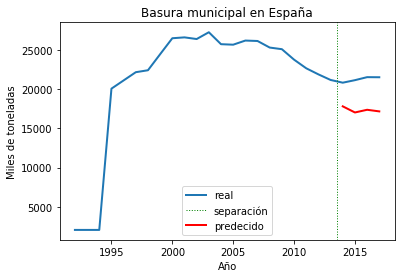

In [20]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura municipal en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Household

In [21]:
years = list(esp.Year)
mun = list(esp.Household)
predictions = clf2.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[1] for a in scalerY.inverse_transform([[0,a,0,0,0,0,0] for a in predictions])]

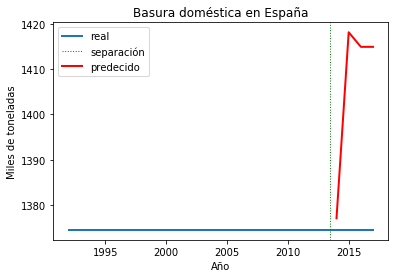

In [22]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura doméstica en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recovered

In [23]:
years = list(esp.Year)
mun = list(esp.Recovered)
predictions = clf3.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[2] for a in scalerY.inverse_transform([[0,0,a,0,0,0,0] for a in predictions])]

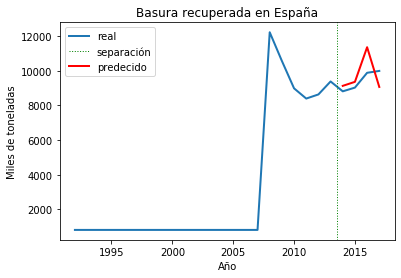

In [24]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura recuperada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recicled

In [25]:
years = list(esp.Year)
mun = list(esp.Recicled)
predictions = clf4.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[3] for a in scalerY.inverse_transform([[0,0,0,a,0,0,0] for a in predictions])]

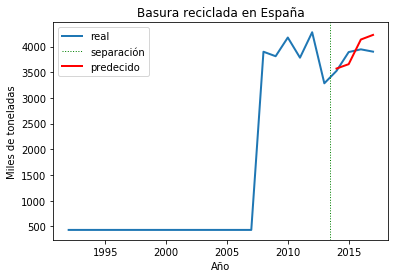

In [26]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura reciclada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Compost

In [27]:
years = list(esp.Year)
mun = list(esp.Compost)
predictions = clf5.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[4] for a in scalerY.inverse_transform([[0,0,0,0,a,0,0] for a in predictions])]

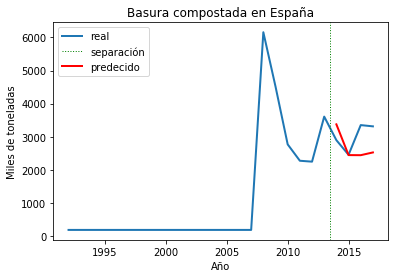

In [28]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura compostada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Disposal

In [10]:
years = list(esp.Year)
mun = list(esp.Disposal)
predictions = clf6.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[5] for a in scalerY.inverse_transform([[0,0,0,0,0,a,0] for a in predictions])]

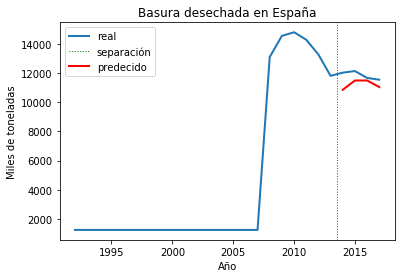

In [11]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura desechada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()